In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msn

In [2]:
heart = pd.read_csv("https://raw.githubusercontent.com/2803Aditya/Heart-Failure-Prediction/main/heart_failure_clinical_records_dataset.csv")
heart.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


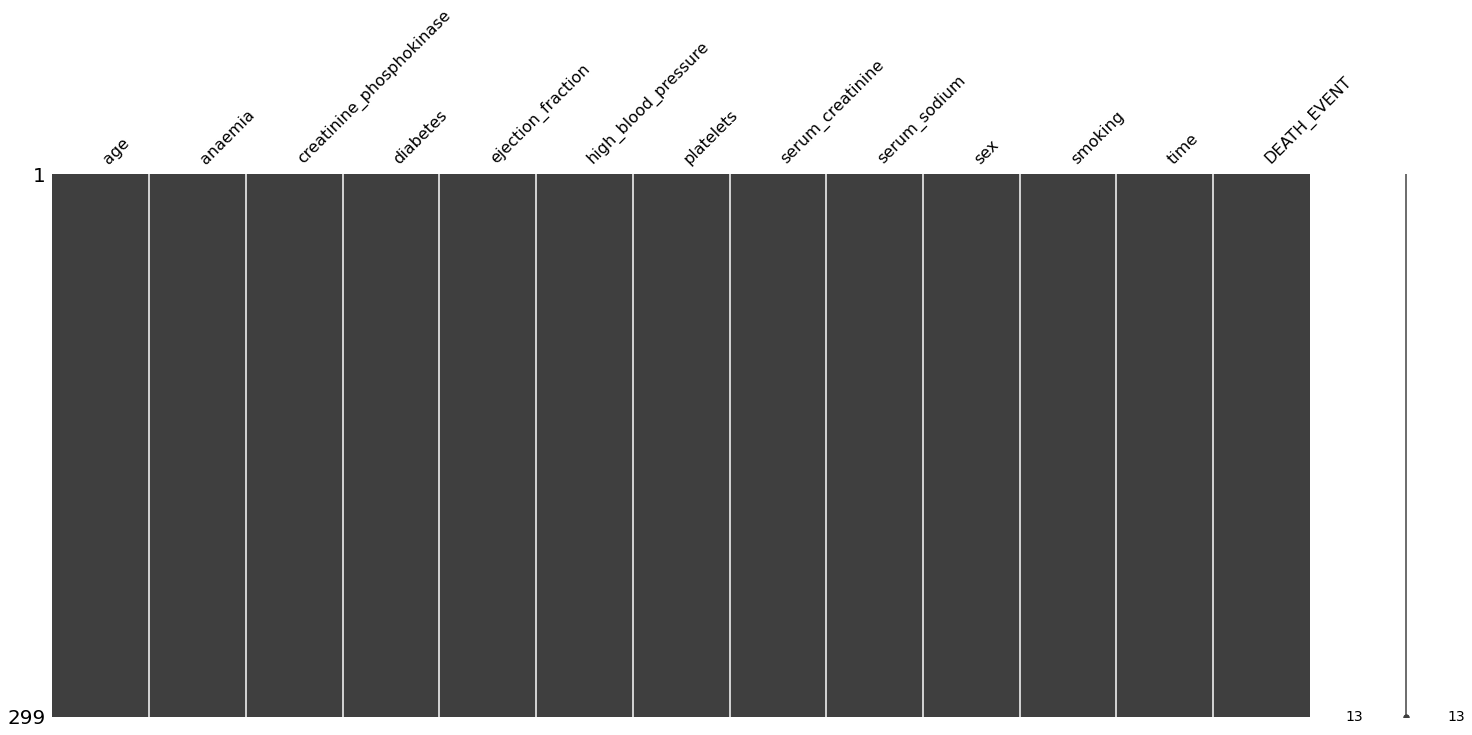

In [6]:
msn.matrix(heart)

In [7]:
heart.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

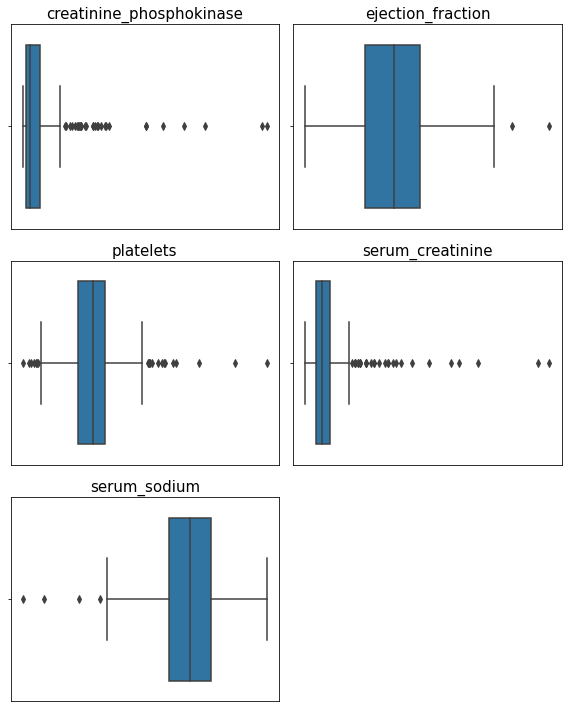

In [8]:

fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 10))

ax = [ax1, ax2 ,ax3, ax4 ,ax5]

feature = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i, axes in zip(feature, ax):
    sns.boxplot(heart[i], ax = axes)
    
    axes.set_title(i, fontsize = 15)
    axes.set_xticks([])
    axes.set_xlabel('')
    
ax6.set_visible(False)
plt.tight_layout()
plt.show()

IQR Score : age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
DEATH_EVENT                     1.0
dtype: float64



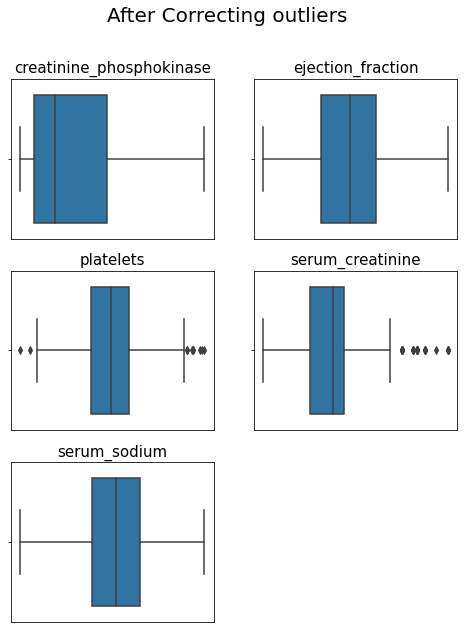

<Figure size 432x288 with 0 Axes>

In [9]:
# Correcting Outilers using IQR Score
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR = Q3 - Q1
print('IQR Score : {}\n'.format(IQR))

heart = heart[~((heart < (Q1 - 1.5 * IQR)) |(heart > (Q3 + 1.5 * IQR)))]

#Filling the outliers value with mean value of corresponding features
heart = heart.fillna(heart.mean())

fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 10))
fig.suptitle('After Correcting outliers', fontsize = 20)

ax = [ax1, ax2 ,ax3, ax4 ,ax5]

feature = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i, axes in zip(feature, ax):
    sns.boxplot(heart[i], ax = axes)
    
    axes.set_title(i, fontsize = 15)
    axes.set_xticks([])
    axes.set_xlabel('')
    

ax6.set_visible(False)

plt.show()
plt.tight_layout()
fig.subplots_adjust(top=0.888)

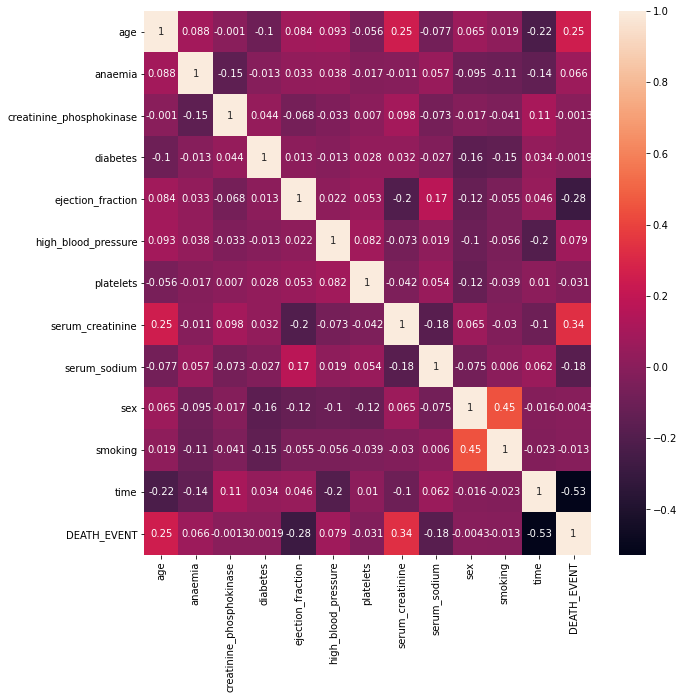

In [10]:
plt.figure(figsize = (10, 10)) 
sns.heatmap(heart.corr(), annot=True)

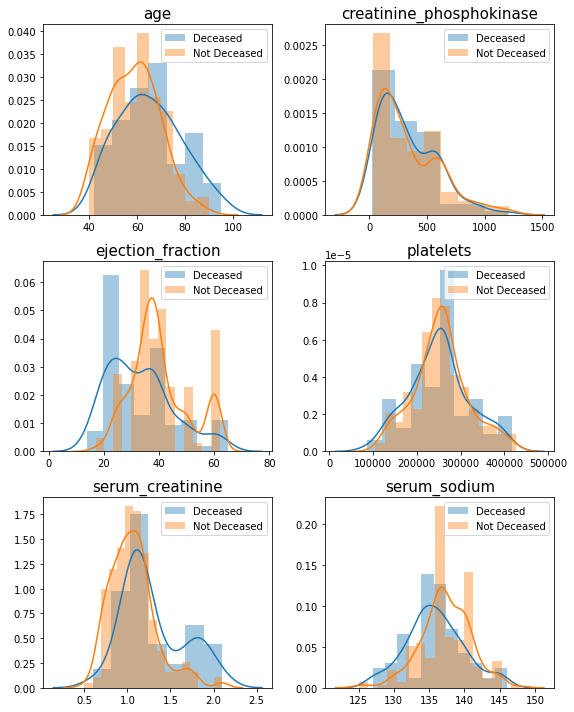

In [11]:

fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 10))

ax = [ax1, ax2 ,ax3, ax4 ,ax5, ax6]

feature = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i, axes in zip(feature, ax):
    sns.distplot(heart[i][heart.DEATH_EVENT == 1], ax = axes, label = 'Deceased')
    sns.distplot(heart[i][heart.DEATH_EVENT == 0], ax = axes, label = 'Not Deceased')
    
    axes.set_title(i, fontsize = 15)
    #axes.set_xticks([])
    axes.set_xlabel('')
    axes.legend()

plt.tight_layout()
plt.show()

In [12]:
X = heart[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

y = heart[['DEATH_EVENT']]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, np.array(y).ravel(), random_state=1,test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression

Linear = LogisticRegression(solver = 'liblinear', max_iter=10000).fit(X_train, y_train)

pred = Linear.predict(X_test)


from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print('Accuracy Score : '.format(Linear.score(X_test, y_test)))
print('\nf1 Score : ', f1_score(y_test, pred))
print('\nPrecision Score : ', precision_score(y_test, pred))
print('\nRecall Score : ', recall_score(y_test, pred))

Accuracy Score : 

f1 Score :  0.7857142857142857

Precision Score :  0.7857142857142857

Recall Score :  0.7857142857142857


In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 15, max_features = 10, max_leaf_nodes = 45).fit(X_train, y_train)

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

pred = model.predict(X_test)

print('Accuracy Score : ', model.score(X_test, y_test))
print('\nf1 Score : ', f1_score(y_test, pred))
print('\nPrecision Score : ', precision_score(y_test, pred))
print('\nRecall Score : ', recall_score(y_test, pred))

Accuracy Score :  0.8

f1 Score :  0.6666666666666665

Precision Score :  0.5454545454545454

Recall Score :  0.8571428571428571


In [16]:
from sklearn.ensemble import RandomForestClassifier

RndClf = RandomForestClassifier(n_estimators = 100, max_depth = 15, max_leaf_nodes = 40).fit(X_train, y_train)

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

pred = RndClf.predict(X_test)

print('Accuracy Score : ', RndClf.score(X_test, y_test))
print('\nf1 Score : ', f1_score(y_test, pred))
print('\nPrecision Score : ', precision_score(y_test, pred))
print('\nRecall Score : ', recall_score(y_test, pred))

Accuracy Score :  0.9333333333333333

f1 Score :  0.8461538461538461

Precision Score :  0.9166666666666666

Recall Score :  0.7857142857142857
